In [72]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf

plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (10, 8)
import imageio as imageio
import glob

In [73]:
def getEr(lambd):
    m = 9.10938356e-31
    q = 1.60217662e-19
    c = 299792458
    w = 2 * np.pi * c / lambd
    return m * w * c / q

In [74]:
Er = getEr(1e-6)
Er


3210701072782.3525

In [75]:
EXTENT = [-20, 20, -20, 20]
all_files = [f for f in os.listdir(".") if f.endswith(".sdf")]


In [76]:
data = sdf.read(all_files[0])


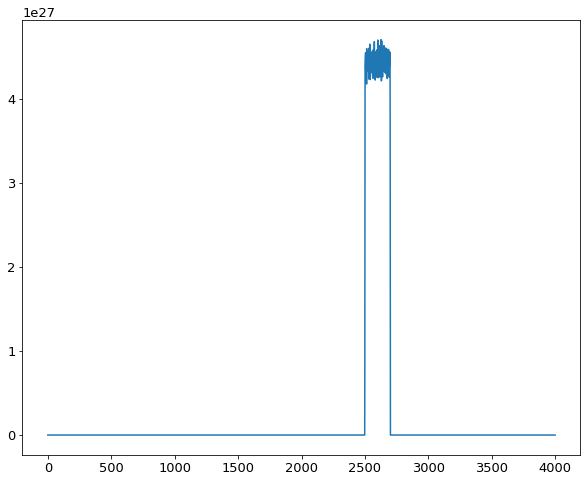

In [77]:
plt.plot(data.Derived_Number_Density_Electron.data)


In [78]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field


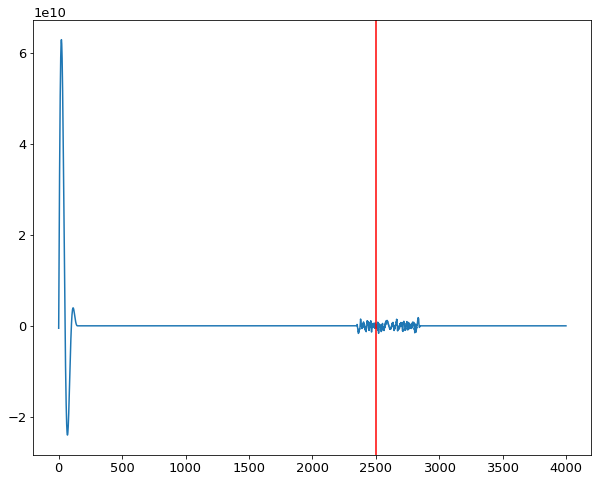

In [79]:
Ey = get_field(5)
plt.plot(Ey)
plt.axvline(2500, color="red")
plt.show()


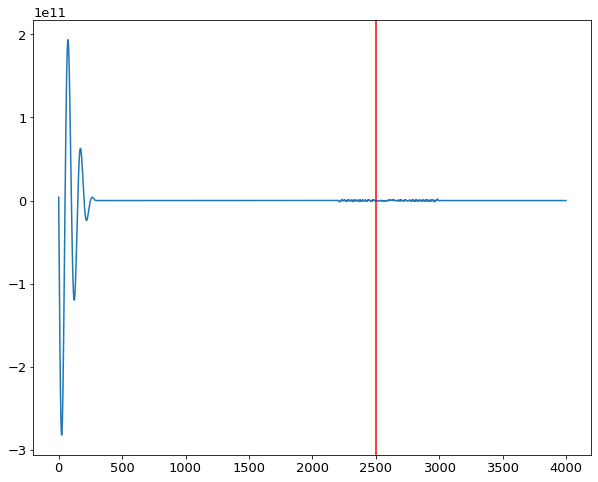

(0.0, 1.0)

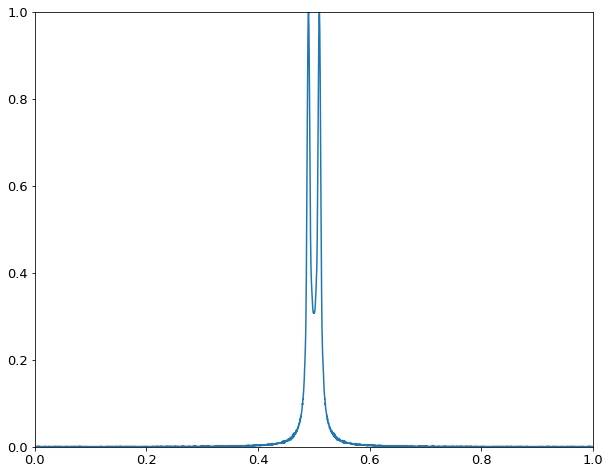

In [80]:
Ey = get_field(10)
plt.plot(Ey)
plt.axvline(2500, color="red")
plt.show()

Ey_f = np.abs(np.fft.fft(Ey))
Ey_f = np.fft.fftshift(Ey_f)
plt.plot(np.linspace(0, 1, 4000), Ey_f / np.max(Ey_f))
plt.axvline(500, color="red")
plt.xlim(0, 1)
plt.ylim(0, 1)

In [81]:
Et1 = []
Et2 = []
d = []
all_field = []
for i in range(len(all_files)):
    data = get_field(i)
    all_field.append(data)
    Et1.append(data[400])
    Et2.append(data[2300])
    data = sdf.read(all_files[i])
    d.append(data.Derived_Number_Density_Electron.data)


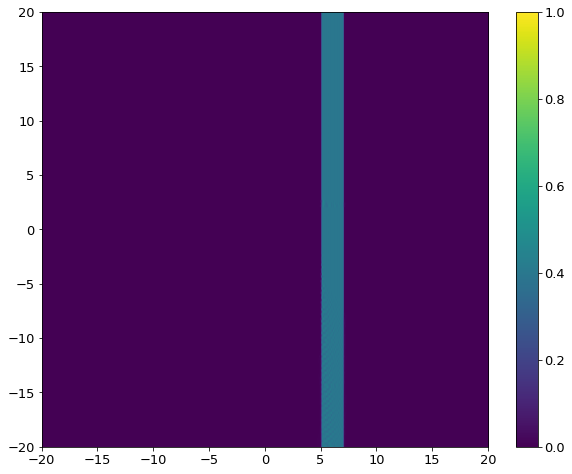

In [82]:
plt.imshow(d / np.max(d), aspect="auto", extent=EXTENT)
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

In [83]:
len(Et1)


185

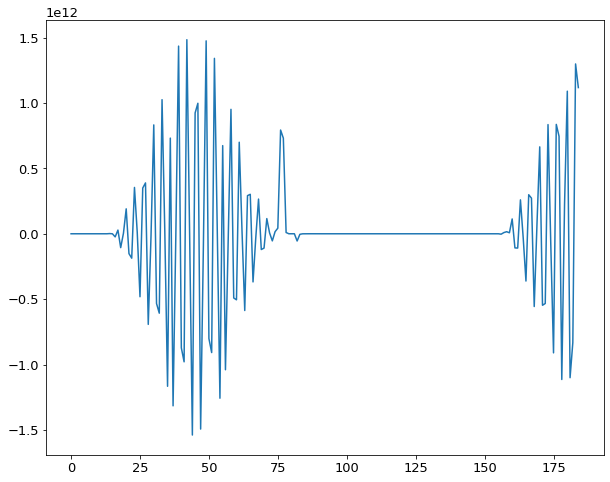

In [84]:
plt.plot(Et1)


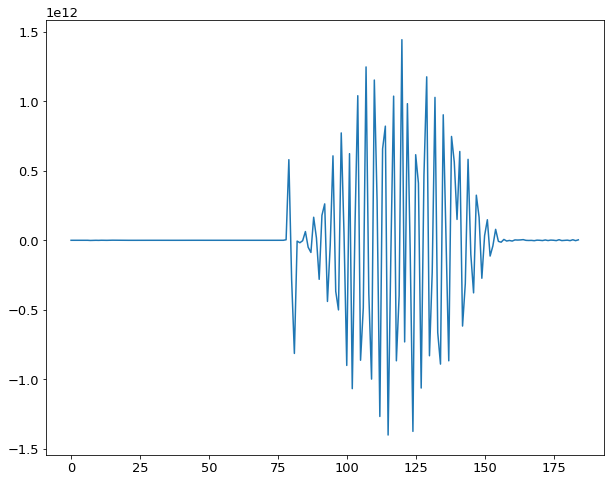

In [85]:
plt.plot(Et2)


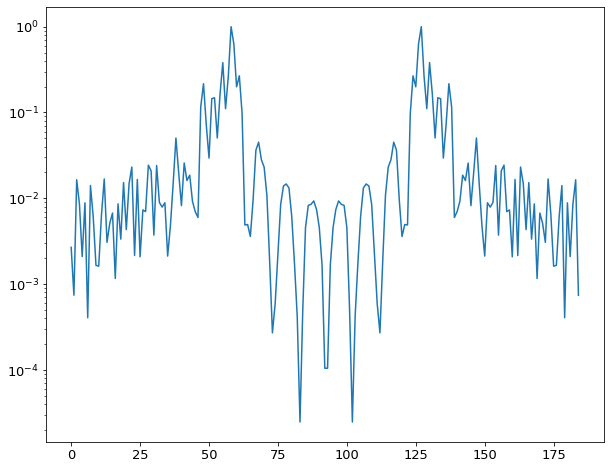

In [86]:
eyt = np.abs(np.fft.fft(np.array(Et1)))
# eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2 / np.max(eyt**2))
plt.yscale("log")
# plt.ylim(0,1)

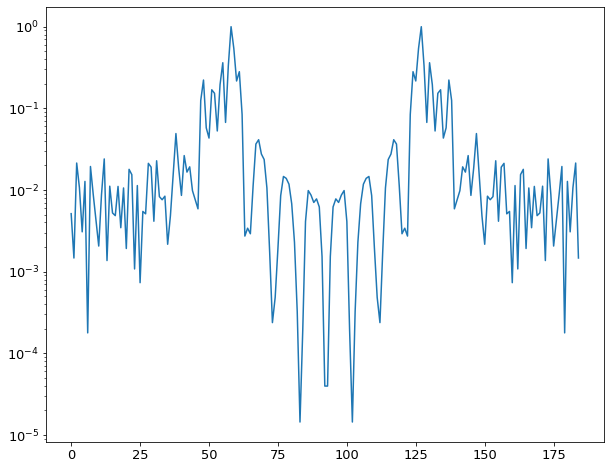

In [70]:
eyt = np.abs(np.fft.fft(np.array(Et1)))
# eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2 / np.max(eyt**2))
plt.yscale("log")
# plt.ylim(0,1)

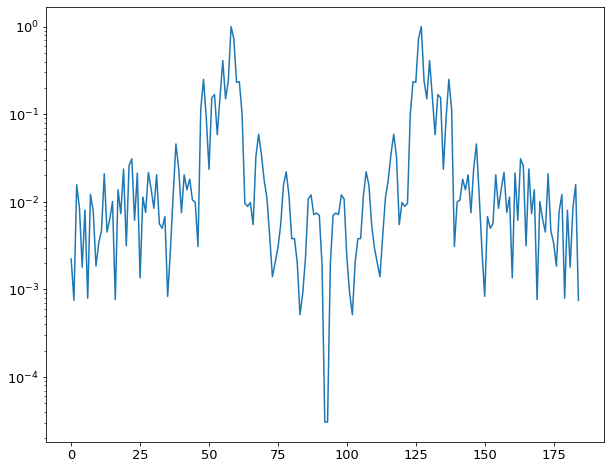

In [53]:
eyt = np.abs(np.fft.fft(np.array(Et1)))
# eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2 / np.max(eyt**2))
plt.yscale("log")
# plt.ylim(0,1)

(0.0, 1.0)

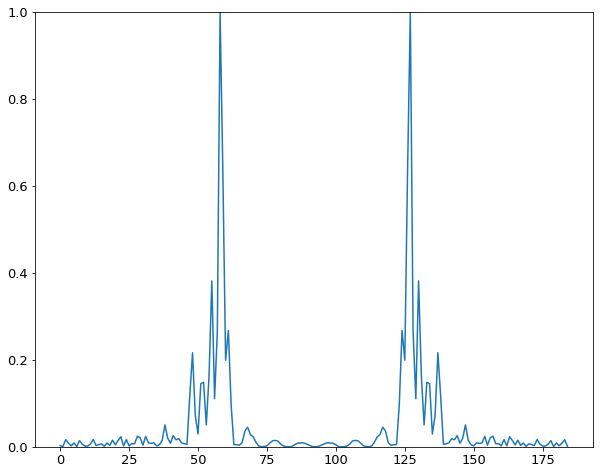

In [36]:
eyt = np.abs(np.fft.fft(np.array(Et1)))
# eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2 / np.max(eyt**2))
plt.ylim(0, 1)

(0.0, 1.0)

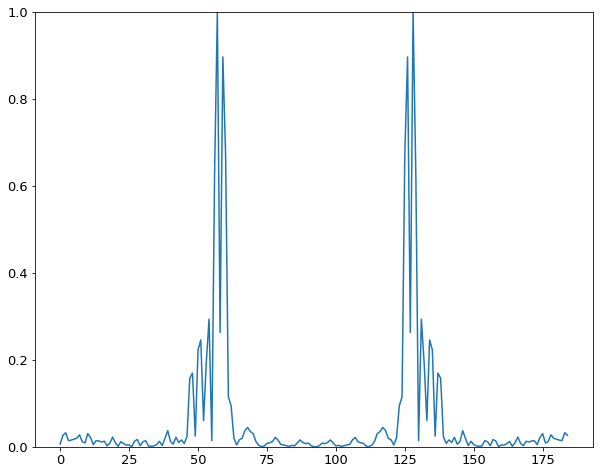

In [18]:
eyt = np.abs(np.fft.fft(np.array(Et1)))
# eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2 / np.max(eyt**2))
plt.ylim(0, 1)

In [48]:
omega_0 = 2 * np.pi * 299792458 / 1e-6
omega_0 * 1e-15

1.8836515673088534

In [96]:
tau = 3.3333333333333335e-15

domega = 2 * np.pi * 1e15 / 20 * tau
N = 6570
T = 50 * tau
dt = T / N
Fs = 1 / dt
L = 168

In [97]:
domega


1.0471975511965979

In [94]:
domega * N / 2

3440.0439556808237

In [98]:
f = Fs * np.arange(0, L // 2 + 1) / L
omega = 2 * np.pi * f
omega / omega_0

array([ 0.        ,  0.78268432,  1.56536865,  2.34805297,  3.13073729,
        3.91342162,  4.69610594,  5.47879026,  6.26147459,  7.04415891,
        7.82684323,  8.60952756,  9.39221188, 10.1748962 , 10.95758053,
       11.74026485, 12.52294917, 13.3056335 , 14.08831782, 14.87100214,
       15.65368647, 16.43637079, 17.21905511, 18.00173944, 18.78442376,
       19.56710808, 20.34979241, 21.13247673, 21.91516105, 22.69784538,
       23.4805297 , 24.26321402, 25.04589835, 25.82858267, 26.61126699,
       27.39395132, 28.17663564, 28.95931996, 29.74200429, 30.52468861,
       31.30737294, 32.09005726, 32.87274158, 33.65542591, 34.43811023,
       35.22079455, 36.00347888, 36.7861632 , 37.56884752, 38.35153185,
       39.13421617, 39.91690049, 40.69958482, 41.48226914, 42.26495346,
       43.04763779, 43.83032211, 44.61300643, 45.39569076, 46.17837508,
       46.9610594 , 47.74374373, 48.52642805, 49.30911237, 50.0917967 ,
       50.87448102, 51.65716534, 52.43984967, 53.22253399, 54.00

In [78]:
len(f)


50

In [50]:
t = np.arange(1, len(all_files) + 1)
omega = 2 * np.pi * 1e15 / (t)
# omega = omega/omega_0
# assert len(omega)==len(Et1)

In [52]:
max(omega)


6283185307179586.0

In [72]:
L // 2

83

In [19]:
eyt = np.array(Et2) / Er
eyt = np.abs(np.fft.fft(eyt))
plt.plot(omega, eyt**2)[: L // 2] / np.max(eyt**2)
plt.ylim(0, 1)

NameError: name 'omega' is not defined

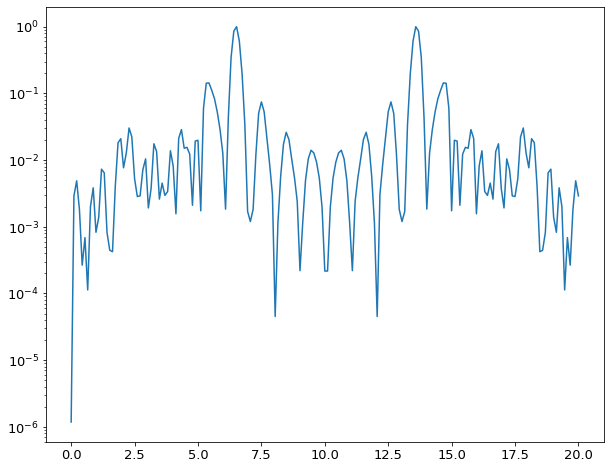

In [87]:
eyt = np.array(Et2) / Er
eyt = np.abs(np.fft.fft(eyt))
plt.plot(np.linspace(0, 20, len(eyt)), eyt**2 / np.max(eyt**2))
# plt.ylim(0,1);
plt.yscale("log")

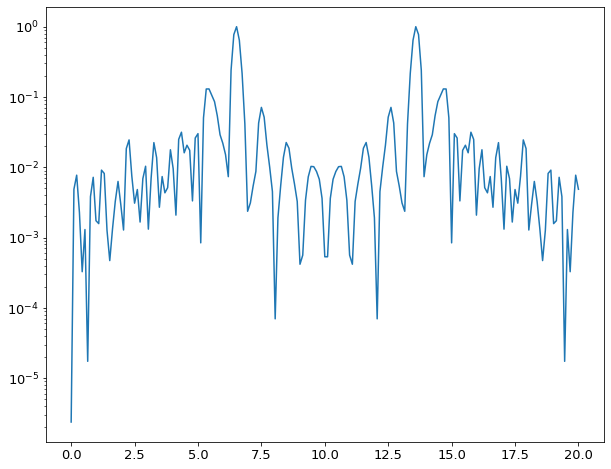

In [71]:
eyt = np.array(Et2) / Er
eyt = np.abs(np.fft.fft(eyt))
plt.plot(np.linspace(0, 20, len(eyt)), eyt**2 / np.max(eyt**2))
# plt.ylim(0,1);
plt.yscale("log")

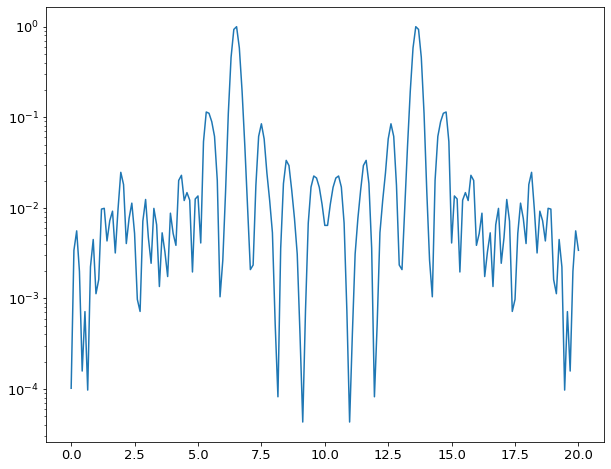

In [54]:
eyt = np.array(Et2) / Er
eyt = np.abs(np.fft.fft(eyt))
plt.plot(np.linspace(0, 20, len(eyt)), eyt**2 / np.max(eyt**2))
# plt.ylim(0,1);
plt.yscale("log")

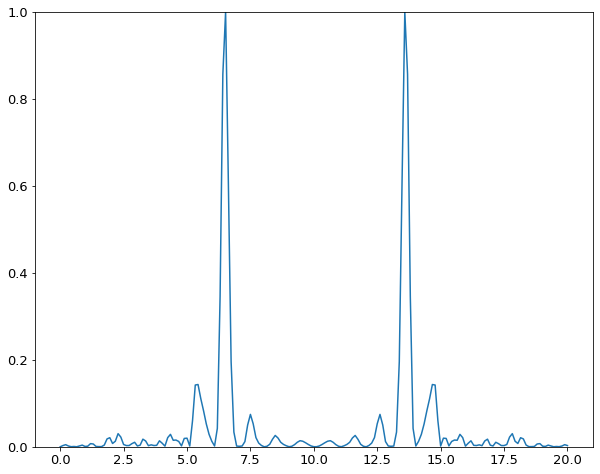

In [37]:
eyt = np.array(Et2) / Er
eyt = np.abs(np.fft.fft(eyt))
plt.plot(np.linspace(0, 20, len(eyt)), eyt**2 / np.max(eyt**2))
plt.ylim(0, 1)

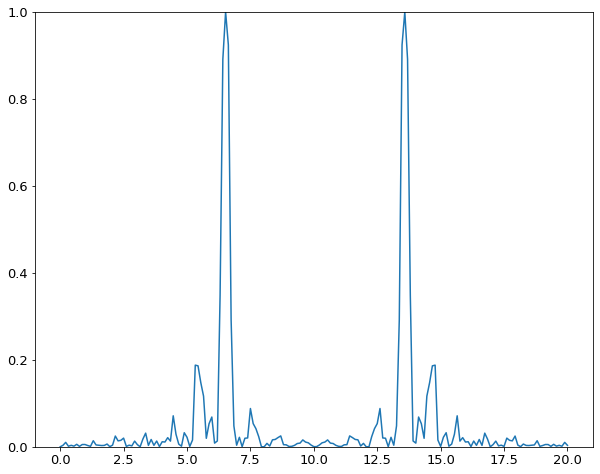

In [20]:
eyt = np.array(Et2) / Er
eyt = np.abs(np.fft.fft(eyt))
plt.plot(np.linspace(0, 20, len(eyt)), eyt**2 / np.max(eyt**2))
plt.ylim(0, 1)

In [55]:
def plot_field(file, component="y", save=True, dir=".temp"):
    raw_data = sdf.read(file)
    image_name = file.split(".sdf")[0]
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    t = raw_data.Header["time"] * 1e15
    x = np.linspace(-6, 6, len(field))
    plt.plot(x, field)
    plt.axvline(0, color="red", lw=2)
    plt.axvline(2, color="red", lw=2)
    plt.xlabel("x [$\mu m$]")
    plt.ylabel("E [$\\frac{N}{C}$]")
    plt.title(f"E{component} at {t:.0f} fs")
    if save:
        plt.savefig(dir + "/" + image_name + ".jpg")
        plt.close()
    else:
        plt.show()

In [56]:
def make_video(dir=".temp", name="video.mp4", delete=False):
    images = []
    files = glob.glob(f"{dir}/*.jpg")
    for file in files:
        images.append(imageio.imread(file))
    if name.endswith(".mp4"):
        imageio.mimsave(f"{dir}/{name}", images)
    else:
        imageio.mimsave(f"{dir}/{name}", images, duration=0.1)
    if delete:
        for file in files:
            os.remove(file)


In [57]:
# i=0
# for file in all_files:
#     print(i, end="\r")
#     plot_field(file)
#     i+=1


In [58]:
# make_video(delete=True)


In [59]:
data = sdf.read(all_files[1])


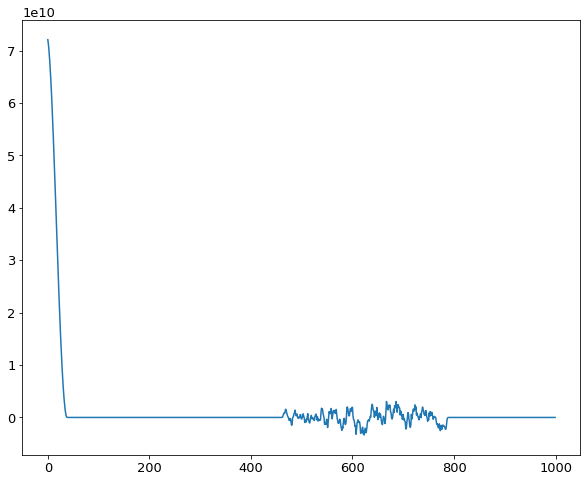

In [60]:
plt.plot(data.Electric_Field_Ey.data)
